In [ ]:
# Install packages

#!pip install requirements.txt

In [14]:
# Import packages

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from langdetect import detect, DetectorFactory
import re
import numpy as np
import requests
from PIL import Image
from io import BytesIO
import matplotlib.pyplot as plt
import math
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter
import matplotlib.pyplot as plt
import re

In [2]:
# Import csv

df = pd.read_csv('/Users/tessacannon/Documents/Vinted Project/y2k_0508.csv')

In [3]:
# Visualize the df
display(df)

title             brand  \
0                      y2k fitted blouse short-sleeved           topshop   
1                              women’s y2k denim jeans             denim   
2                                              y2k top             shein   
3    black and silver floral knitted embroidered sw...          new look   
4    cute y2k silk style lace baby blue / turquoise...               y2k   
..                                                 ...               ...   
758  y2k coquette polka dot baby yellow sheer linge...         silver ox   
759  vintage y2k ruffle mohair wool ribbon tie card...     made in italy   
760              vintage y2k low rise denim mini skirt  vintage dressing   
761  y2k vintage sporty style graphic print racer v...               y2k   
762                             distressed mini skirt.             other   

        condition    size  price  total_price  seller_description  \
0            good  xs / 6    3.0         3.85                 NaN   
1    satisfactory   other    1.5         2.28                 NaN   
2       very good   s / 8    1.0         1.75                 NaN   
3       very good  m / 10    2.5         3.33                 NaN   
4       very good   s / 8    2.0         2.80                 NaN   
..            ...     ...    ...          ...                 ...   
758          good   s / 8   15.0        16.45                 NaN   
759     very good  m / 10   23.0        24.85                 NaN   
760     very good  m / 10   24.0        25.90                 NaN   
761     very good  m / 10   21.0        22.75                 NaN   
762          good   s / 8   22.0        23.80                 NaN   

                                              item_url  \
0    https://www.vinted.co.uk/items/6285846256-y2k-...   
1    https://www.vinted.co.uk/items/6283612810-wome...   
2    https://www.vinted.co.uk/items/6286188391-y2k-...   
3    https://www.vinted.co.uk/items/6288480073-blac...   
4    https://www.vinted.co.uk/items/6284909987-cute...   
..                                                 ...   
758  https://www.vinted.co.uk/items/6290742416-y2k-...   
759  https://www.vinted.co.uk/items/6287019620-vint...   
760  https://www.vinted.co.uk/items/6290807981-vint...   
761  https://www.vinted.co.uk/items/6281210013-y2k-...   
762  https://www.vinted.co.uk/items/6276165891-dist...   

                                             image_url  
0    https://images1.vinted.net/t/02_00fea_uFy3ww51...  
1    https://images1.vinted.net/t/04_007e7_5g3SLLmS...  
2    https://images1.vinted.net/t/04_0062c_PpjBb8ZC...  
3    https://images1.vinted.net/t/04_01bfb_qUoNdGgm...  
4    https://images1.vinted.net/t/04_0172d_qipjx8FH...  
..                                                 ...  
758  https://images1.vinted.net/t/04_02373_JKz4LSLw...  
759  https://images1.vinted.net/t/04_000f9_Hs4MtMo8...  
760  https://images1.vinted.net/t/04_01245_Srh8yQQP...  
761  https://images1.vinted.net/t/02_017b6_aFwkGd6y...  
762  https://images1.vinted.net/t/04_025b3_4WHEdAah...  

[763 rows x 9 columns]

# Data Analysis


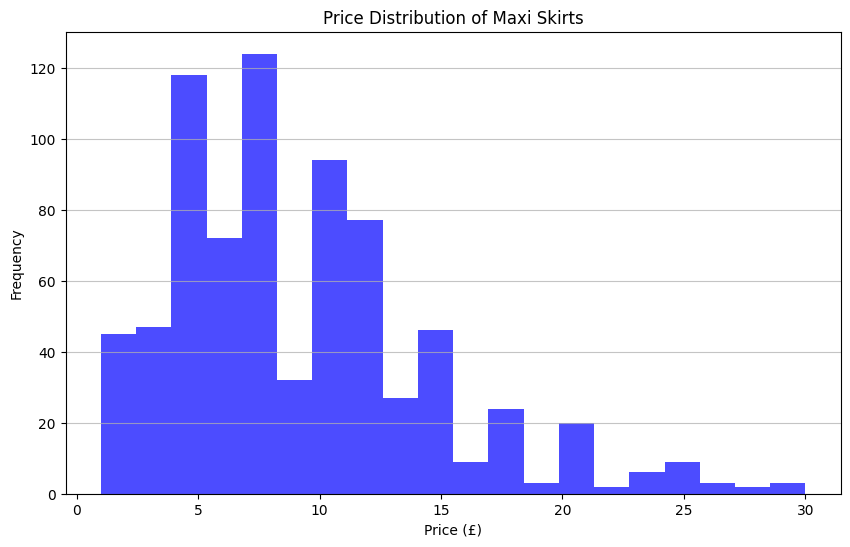

In [4]:
# Get histogram of prices
plt.figure(figsize=(10, 6))
plt.hist(df['price'], bins=20, color='blue', alpha=0.7)
plt.title('Price Distribution of Maxi Skirts')
plt.xlabel('Price (£)')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()

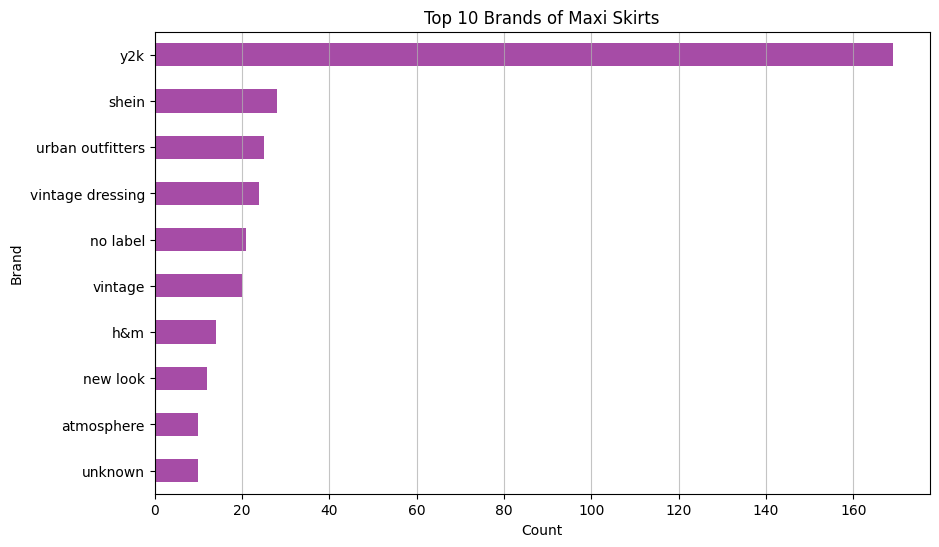

In [5]:
# Get the top 10 brands (horizontal bar chart)
plt.figure(figsize=(10, 6))
top_brands = df['brand'].value_counts().head(10).sort_values(ascending=True)
top_brands.plot(kind='barh', color='purple', alpha=0.7)
plt.title('Top 10 Brands of Maxi Skirts')
plt.xlabel('Count')
plt.ylabel('Brand')
plt.grid(axis='x', alpha=0.75)
plt.show()

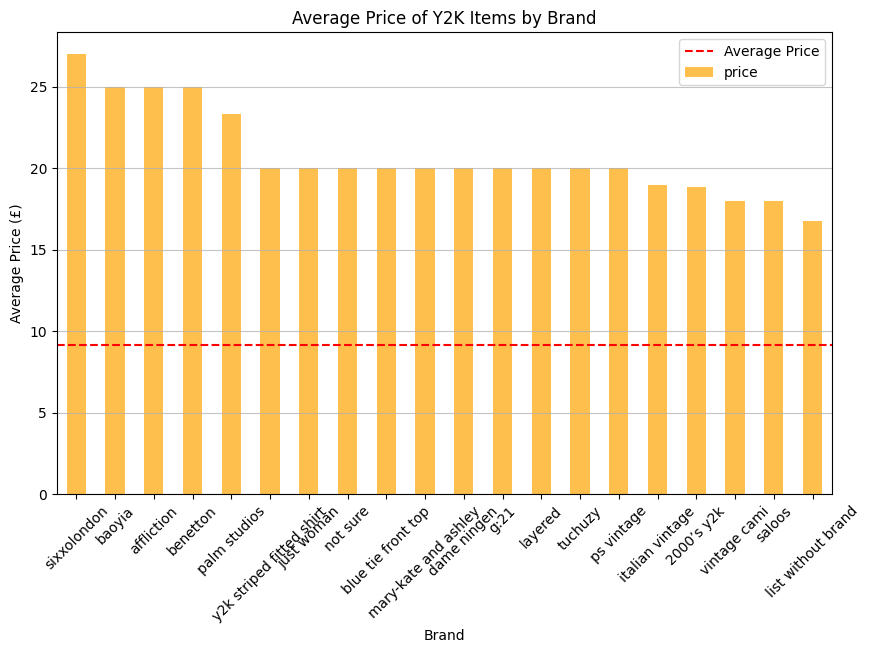

In [6]:
# Get average price by brand 

plt.figure(figsize=(10, 6))
avg_price_by_brand = df.groupby('brand')['price'].mean().sort_values(ascending=False).head(20)
avg_price_by_brand.plot(kind='bar', color='orange', alpha=0.7)
# Add horizontal line at average price
avg_price = df['price'].mean()
plt.axhline(y=avg_price, color='red', linestyle='--', label='Average Price')
plt.legend()
plt.title('Average Price of Y2K Items by Brand')
plt.xlabel('Brand')
plt.ylabel('Average Price (£)')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.75)
plt.show()

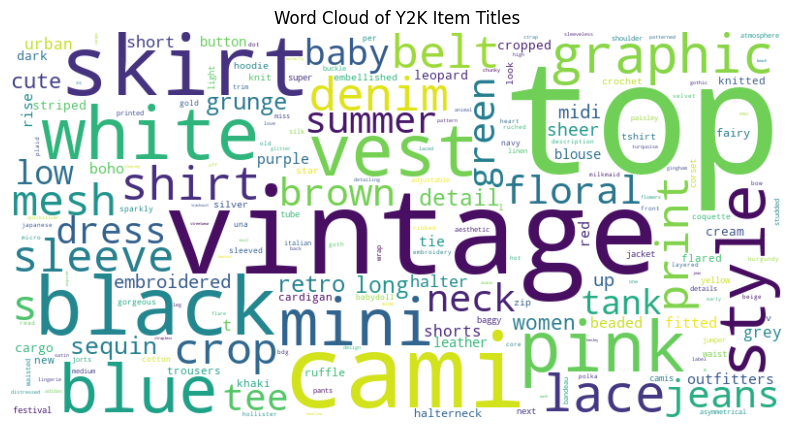

In [16]:
# Get word cloud of item titles

def generate_wordcloud_from_titles(df, text_column="title"):
    # Combine all titles into one string
    all_titles = ' '.join(df[text_column].dropna().astype(str))

    # Basic cleaning: remove punctuation, lowercase, split
    words = re.findall(r'\b[a-zA-Z]+\b', all_titles.lower())

    # Define a basic stopword list (expandable)
    stop_words = {
        "the", "and", "of", "to", "in", "for", "a", "with", "on", "at", "by", "from",
        "is", "an", "be", "this", "or", "it", "as", "that", "are", "size", "uk"
    }

    filtered_words = [word for word in words if word not in stop_words]

    # Count word frequencies
    word_counts = Counter(filtered_words)

    # Generate and display the word cloud
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_counts)

    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title('Word Cloud of Y2K Item Titles')
    plt.show()

generate_wordcloud_from_titles(df, text_column="title")


# Personalized Search

In [ ]:
# Define custom functions

def is_romance_language(text):
    if not isinstance(text, str):
        return False

    # Common accented characters in French, Spanish, and Italian
    accented_chars = "àáâäæãåçèéêëìíîïñòóôöõùúûüýÿ"
    
    # Common Romance-language particles/conjunctions
    romance_keywords = {
        "fr": ["et", "le", "la", "les", "des", "du", "chez", "paris", "france", "français", "française", "elle", "mais", "ou", "où", "que", "qui", "quoi", "dont", "si"],    
        "es": ["y", "de", "el", "la", "los", "las", "del", "en", "con", "por", "para", "que", "quien", "cual", "donde", "si", "pero", "o", "y", "español", "española"],
        "it": ["e", "di", "il", "la", "lo", "gli", "della", "del", "in", "con", "per", "che", "chi", "cosa", "dove", "se", "ma", "o", "italiano", "italiana"],
    }
    # Flatten all keywords
    all_keywords = set(word for lang in romance_keywords.values() for word in lang)

    # Normalize text
    text_lower = text.lower()

    # Check for accented characters
    if any(char in accented_chars for char in text_lower):
        return True

    # Check for presence of romance keywords as whole words
    for word in all_keywords:
        if re.search(rf'\b{re.escape(word)}\b', text_lower):
            return True

    return False


def is_fast_fashion(text):
    fast_fashion_brands = [
    'Zara', 'H&M', 'Forever 21', 'Primark', 'Boohoo', 'PrettyLittleThing', 'Shein', 'Topshop', 'Missguided',
    'New Look', 'ASOS', 'Mango', 'Stradivarius', 'Pull&Bear', 'Bershka', 'Oysho', 'Uterque', 'Zalando', 'Reserved',
    'BoohooMAN', 'Cider', 'Nasty Gal', 'Romwe', 'Zaful', 'Forever21', 'PLT', 'Marks & Spencer', 'Urban Outfitters',
    'Fashion Nova', 'Charlotte Russe', 'Uniqlo', 'Cotton On', 'Shasa', 'Garage', 'Hollister', 'Abercrombie & Fitch',
    'Rue21', 'Wet Seal', 'Papaya', 'Tobi', 'Aeropostale', 'Express', 'Guess', 'American Eagle', 'PacSun', 'Brandy Melville',
    'Lulus', 'ModCloth', 'Free People', 'Anthropologie', 'Aerie', 'Old Navy', 'Gap', 'Banana Republic', 'J.Crew',
    'Pull & Bear', 'Oh Polly', 'Princess Polly','American Apparel', 'Motel Rocks','House of CB'
    ]
    
    # Handle non-string inputs
    if not isinstance(text, str):
        return False
    
    # Convert only non-numeric characters to lowercase
    processed_text = ''.join(char.lower() if not char.isdigit() else char for char in text)
    
    return any(brand.lower() in processed_text for brand in fast_fashion_brands) 

def display_image_grid(image_urls, max_images=20, images_per_row=5):
    """
    Displays a grid of images from a list of URLs.

    Args:
        image_urls (list): List of image URLs.
        max_images (int): Max number of images to show.
        images_per_row (int): Number of images per row in the grid.
    """
    num_images = min(len(image_urls), max_images)
    rows = math.ceil(num_images / images_per_row)
    fig, axs = plt.subplots(rows, images_per_row, figsize=(images_per_row * 3, rows * 4))
    axs = axs.flatten() if num_images > 1 else [axs]

    for i in range(images_per_row * rows):
        ax = axs[i]
        if i < num_images:
            try:
                response = requests.get(image_urls[i], timeout=5)
                img = Image.open(BytesIO(response.content))
                ax.imshow(img)
                ax.axis('off')
            except Exception as e:
                print(f"Failed to load image {i}: {e}")
                ax.axis('off')
        else:
            ax.axis('off')

    plt.tight_layout()
    plt.show()


In [59]:
# Detect french, spanish, or italian brands

df['is_romance'] = df['brand'].apply(is_romance_language)
filtered_df = df[df['is_romance']]
# List number of unqiue brands
unique_brands = filtered_df['brand'].nunique()
print(f"Number of unique brands in romance languages: {unique_brands}")

# Print the romance language brands
romance_brands = filtered_df['brand'].unique()
print("Romance language brands:")
for brand in romance_brands:
    print(brand)


Number of unique brands in romance languages: 8
Romance language brands:
les girls les boys
per una
la chapelle
made in italy
la senza
e-vie
fórmul@
fashion elle


Number of non-fast fashion brands: 636


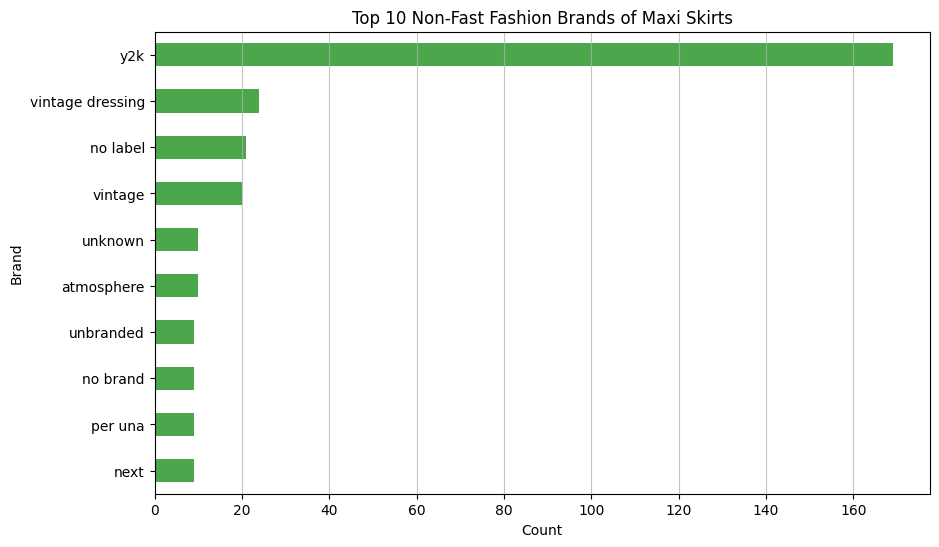

List of non-fast fashion brands:
denim
y2k
no label
source unknown
unknown
miss selfridge
nike
saltrock
next
calvin klein
river island
wild
adidas
harley davidson
fast & furious
pilot
pink
ko & ko
atmosphere
parisian
von dutch
vintage dressing
unbranded
f&f
y2kstudio
star
the unbranded brand
beige
lee cooper
mossy oak
les girls les boys
bundle
pineapple
charlotte ronson
rue 21
vintage boutique
jaded london
juicy couture
george
josie
port & company
zip
y2k vibes
iets frans...
coca-cola
quiz
united colors of benetton
khaki
raging bull
divided
fairy
bolero
ted baker
animal
lecomte
denim co
dnm
matalan
tottie
bdg
miss fiori
walking dead
zone
klass
dorothy perkins
reclaimed vintage
morgan
joe browns
select
pickwick
ronit zilkha
french connection
joy collection
other
jiggy
kooga
vintage style belt
etam
peacocks
my favourite tee
streetwear
rip curl
cute
vintage
loose
weekday
per una
kaleidoscope
bali rose
fanta
la chapelle
boho style
glamour outfitters
superdry
collusion
no brand
ariseism
bay

In [44]:
# Detect fast fashion brands 

# Apply the function to the 'brand' column
df['is_fast_fashion'] = df['brand'].apply(is_fast_fashion)

# Count the number of non-fast fashion brands
non_fast_fashion_count = df[~df['is_fast_fashion']].shape[0]
print(f"Number of non-fast fashion brands: {non_fast_fashion_count}")
# Get the top 10 non-fast fashion brands
plt.figure(figsize=(10, 6))
top_non_fast_fashion_brands = df[~df['is_fast_fashion']]['brand'].value_counts().head(10).sort_values(ascending=True)
top_non_fast_fashion_brands.plot(kind='barh', color='green', alpha=0.7)
plt.title('Top 10 Non-Fast Fashion Brands of Maxi Skirts')
plt.xlabel('Count')
plt.ylabel('Brand')
plt.grid(axis='x', alpha=0.75)
plt.show()

# Get list of non-fast fashion brands
non_fast_fashion_brands = df[~df['is_fast_fashion']]['brand'].unique()
print("List of non-fast fashion brands:")
for brand in non_fast_fashion_brands:
    print(brand)

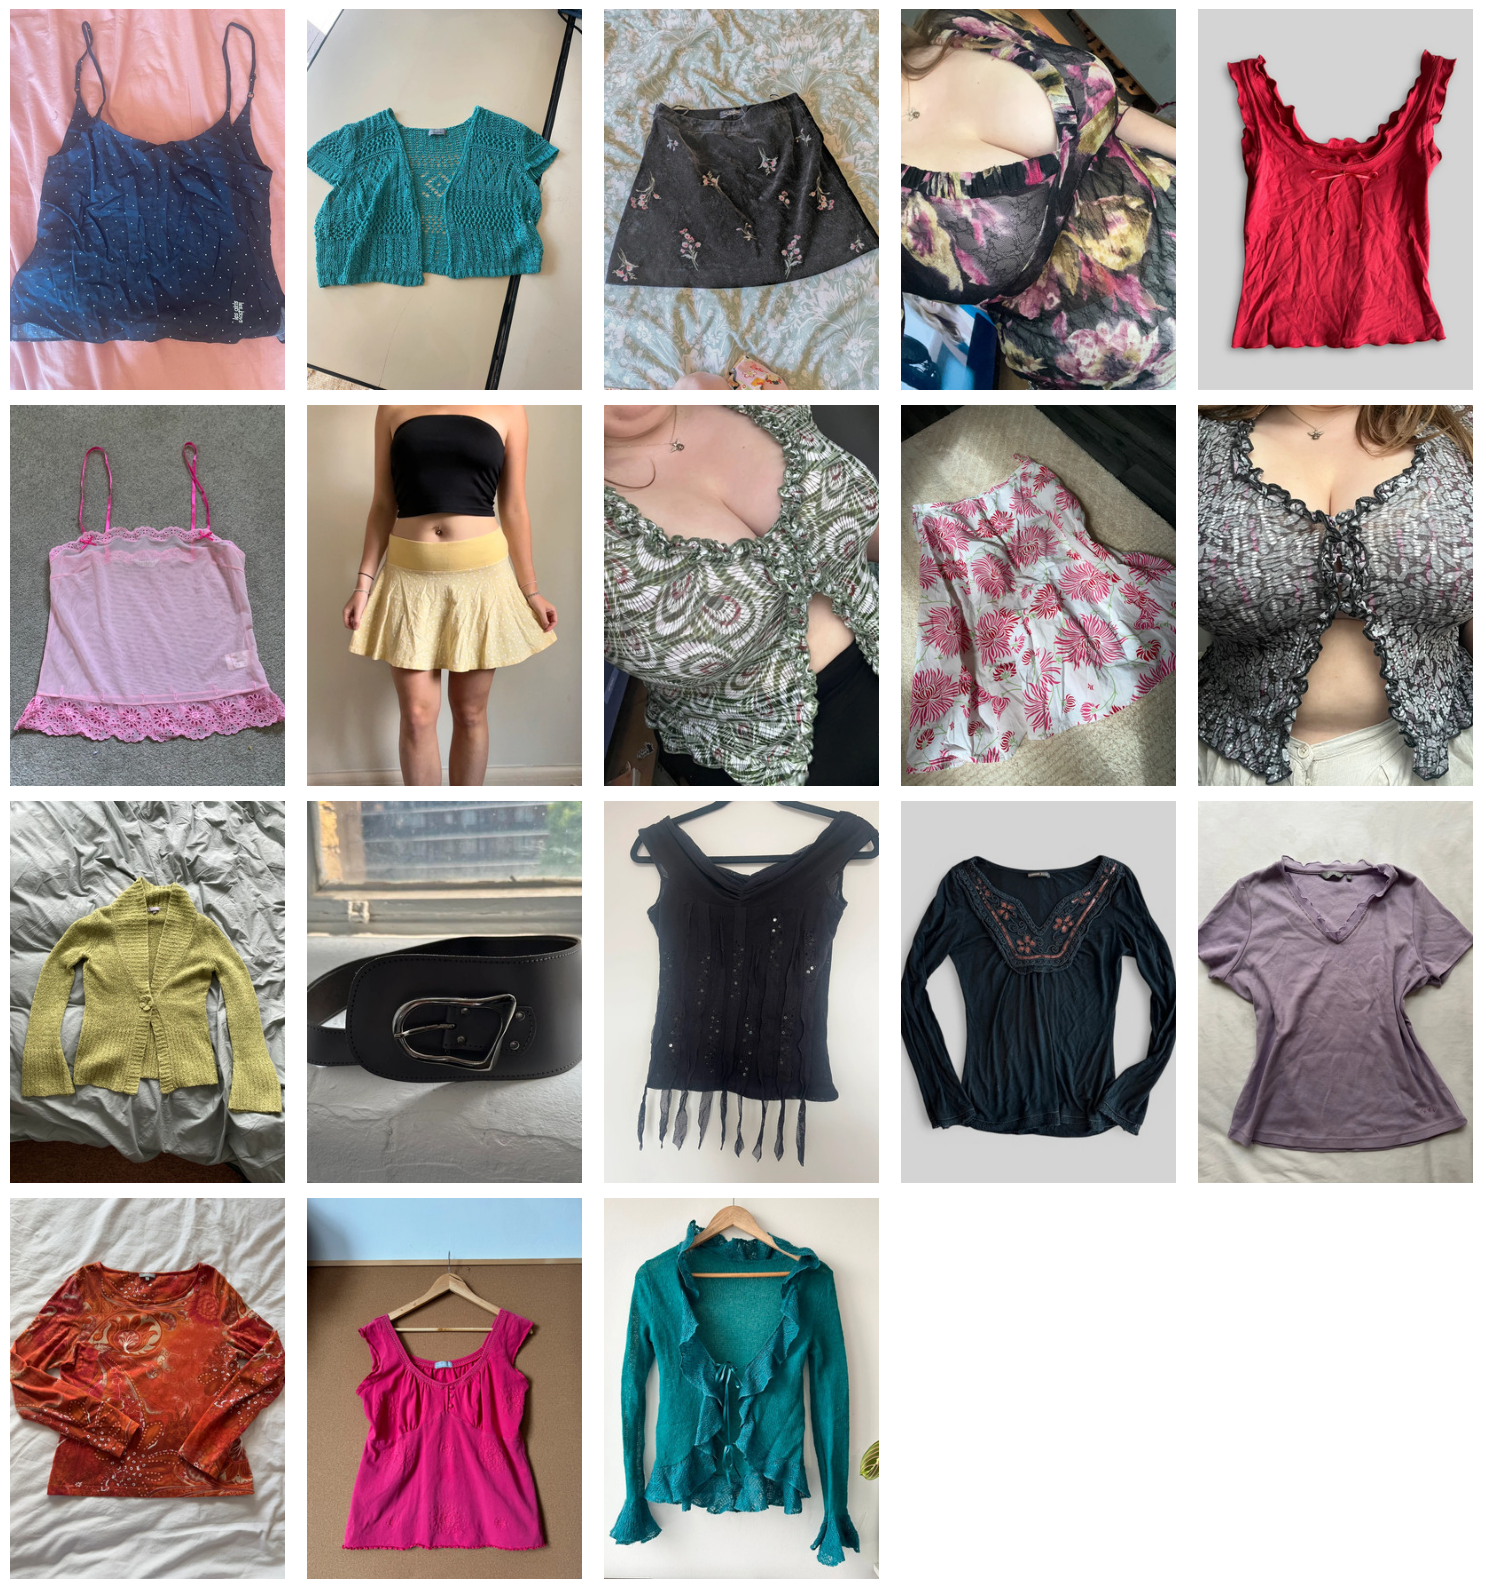

In [62]:
# Create grid of item images

# Get images from the filered df
filtered_df = df[df['is_romance'] == True]
image_urls = filtered_df['image_url'].tolist()

# Show the first 20 images in a 5x4 grid
display_image_grid(image_urls, max_images=50, images_per_row=5)
